In [2]:
import json
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import networkx as nx
import matplotlib.pyplot as plt
from src.models.MatchingType import MatchingType

In [3]:
con = sqlite3.connect('../data/interim/articles_with_author_mapping.db')
cur = con.cursor()

In [5]:
cur.execute("select name, abbreviation from unmapped_authors where matching_type = ? or matching_type = ? limit 100", (MatchingType.FUZZY_MATCH.name, MatchingType.DIRECT_MATCH.name))
rows = cur.fetchall()
authors = pd.DataFrame(columns=["name", "abbreviation"], data=rows)

In [6]:
# remove duplicates
authors = authors.drop_duplicates()
authors

,name,abbreviation
0,Kai-Uwe Brandt,kub
1,Nadja Topfstedt,jap
2,Andreas Tappert,art
4,Andreas Tappert,ast
5,Annett Riedel,ar
9,Antje Henselin-Rudolph,ahr
10,Heike Liesaus,lis
11,Nico Fliegner,nf
12,Frank Pfütze,pfü
13,Kendra Reinhardt,ka


In [7]:
# remove self referencing nodes
authors = authors[authors["name"] != authors["abbreviation"]]

In [8]:
# add name and abbreviation as nodes list and remove duplicates
nodes = list(authors["name"].unique()) + list(authors["abbreviation"].unique())

# add unique edges based on entries in the authors table
edges = []
for index, row in authors.iterrows():
    edges.append((row["name"], row["abbreviation"]))

In [9]:
G = nx.Graph()
G.add_nodes_from(list(authors["name"].unique()), bipartite=0)
G.add_nodes_from(list(authors["abbreviation"].unique()), bipartite=1)
G.add_edges_from(edges)

In [10]:
print(f"number of nodes: {G.number_of_nodes()}, number of edges: {G.number_of_edges()}")

number of nodes: 40, number of edges: 21


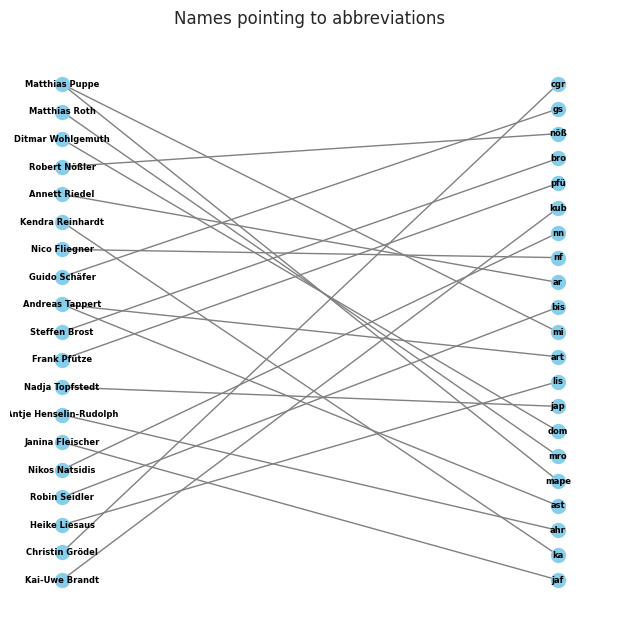

In [11]:
# Draw the graph
pos = nx.bipartite_layout(G, list(authors["name"].unique()))
plt.figure(figsize=[6, 6])
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=6, font_weight='bold', edge_color='gray')
plt.title('Names pointing to abbreviations')
plt.savefig('../reports/figures/names_to_abbreviations.png', dpi=300)